## Final Project – Time series forecasting using ML

### Bitcoin (BTC)  Price Prediction [Team K]

#### (1) import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import spacy
import nltk
import collections
import itertools
import collections
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords   
from nltk import wordpunct_tokenize 
from sklearn.preprocessing import LabelBinarizer
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from fastai.tabular.all import *


from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#### (2) load & check dataset

In [5]:
df = pd.read_csv("Bitfinex_BTCEUR_d.csv")

In [6]:
df.head()

unix                 date   symbol     open       high        low  \
0  1655251200000  2022-06-15 00:00:00  BTC/EUR  21198.0  21226.788  20990.000   
1  1655164800000  2022-06-14 00:00:00  BTC/EUR  21592.0  22393.000  20045.417   
2  1655078400000  2022-06-13 00:00:00  BTC/EUR  25393.0  25686.000  21093.000   
3  1654992000000  2022-06-12 00:00:00  BTC/EUR  27029.0  27150.000  25394.000   
4  1654905600000  2022-06-11 00:00:00  BTC/EUR  27672.0  27973.000  26762.000   

         close    Volume EUR   Volume BTC  
0  21168.00000  3.083673e+05    14.567614  
1  21247.87104  2.532188e+07  1191.737234  
2  21606.81750  4.029265e+07  1864.811986  
3  25402.56441  1.086879e+07   427.862005  
4  27033.00000  4.560265e+06   168.692525

In [7]:
df.tail()

unix                 date   symbol     open     high      low  \
1663  1511568000  2017-11-25 00:00:00  BTC/EUR  6882.01  7368.57  6835.20   
1664  1511481600  2017-11-24 00:00:00  BTC/EUR  6797.70  7110.00  6721.66   
1665  1511395200  2017-11-23 00:00:00  BTC/EUR  7014.00  7040.00  6797.33   
1666  1511308800  2017-11-22 00:00:00  BTC/EUR  6906.20  7076.96  6884.04   
1667  1511222400  2017-11-21 00:00:00  BTC/EUR  6932.35  6979.20  6792.43   

        close  Volume EUR  Volume BTC  
1663  7368.40  8505471.98     1188.21  
1664  6882.01  3875106.56      559.79  
1665  6797.70  1665816.84      239.54  
1666  7014.00  3367629.13      481.29  
1667  6906.20  1158234.52      167.93

In [8]:
df.shape

(1668, 9)

In [9]:
df.describe()

unix          open          high           low         close  \
count  1.668000e+03   1668.000000   1668.000000   1668.000000   1668.000000   
mean   6.800128e+11  17496.085670  17989.850627  16930.796620  17504.259637   
std    8.011065e+11  15294.231042  15699.337150  14815.646370  15291.698832   
min    1.511222e+09   2901.300000   2939.300000   2844.340000   2901.300000   
25%    1.547230e+09   6511.750000   6675.850000   6339.675000   6511.750000   
50%    1.583237e+09   8938.710000   9195.304797   8672.991007   8944.175000   
75%    1.619244e+12  30306.446667  31511.000000  28958.000000  30318.860501   
max    1.655251e+12  58277.000000  59701.683840  57231.710510  58275.000000   

         Volume EUR    Volume BTC  
count  1.668000e+03   1668.000000  
mean   1.489546e+07   1164.937011  
std    1.698877e+07   1348.549721  
min    2.587464e+05     14.567614  
25%    4.558488e+06    413.875000  
50%    9.442843e+06    729.109944  
75%    1.876892e+07   1371.055489  
max    1.823744e+08  16415.260000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        1668 non-null   int64  
 1   date        1668 non-null   object 
 2   symbol      1668 non-null   object 
 3   open        1668 non-null   float64
 4   high        1668 non-null   float64
 5   low         1668 non-null   float64
 6   close       1668 non-null   float64
 7   Volume EUR  1668 non-null   float64
 8   Volume BTC  1668 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 117.4+ KB


##### check if there are null or NaN values in our dataset, in order to drop the rows contain them.

In [11]:
print('Null values in dataset:',df.isnull().values.sum())
print('NaN values in dataset:',df.isnull().values.any())

Null values in dataset: 0
NaN values in dataset: False


#####  but we have not, so we continue.

#### (3) Exploratory Data Analysis (EDA)

In [12]:
end_date=df.iloc[0][1]
start_date=df.iloc[-1][1]
print("start date: ", start_date)
print("end date: ", end_date)

start date:  2017-11-21 00:00:00
end date:  2022-06-15 00:00:00


##### we drop the time of the "date" column, as the time was 00:00:00 in all days.

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

##### year 2018 analysis

In [14]:
year_2018 = df.loc[(df['date'] >= '2018-01-01')
                     & (df['date'] < '2019-01-01')]

year_2018.drop(year_2018[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date      open      high       low     close
1262 2018-12-31   3472.60   3483.70   3297.00   3331.50
1263 2018-12-30   3398.19   3500.00   3356.75   3472.60
1264 2018-12-29   3525.00   3584.10   3374.50   3398.19
1265 2018-12-28   3247.80   3579.50   3226.30   3525.00
1266 2018-12-27   3460.50   3489.40   3225.00   3247.80
...         ...       ...       ...       ...       ...
1622 2018-01-05  12553.15  14214.00  12200.00  14059.53
1623 2018-01-04  12611.93  12842.00  11698.00  12553.15
1624 2018-01-03  12190.00  12809.00  12057.57  12611.93
1625 2018-01-02  11133.00  12861.85  10651.00  12190.00
1626 2018-01-01  11467.00  11581.00  10663.00  11133.00

[365 rows x 5 columns]

In [15]:
monthvise= year_2018.groupby(year_2018['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open         close
date                                 
January    10708.182258  10605.053226
February    7599.963214   7606.738214
March       7371.418710   7279.789677
April       6470.698667   6538.153667
May         7161.881935   7121.790000
June        5825.215000   5794.138333
July        6056.954839   6093.932258
August      5803.968387   5785.261935
September   5667.992000   5656.918333
October     5689.291613   5687.130645
November    4876.565000   4807.964000
December    3323.201613   3315.517742

In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='firebrick'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='darksalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price in year 2018')
fig.show()

In [17]:
year_2018.groupby(year_2018['date'].dt.strftime('%B'))['low'].min()
monthvise_high = year_2018.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = year_2018.groupby(year_2018['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='firebrick'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='darksalmon'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price in year 2018')
fig.show()


In [18]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_2018, x=year_2018.date, y=[year_2018['open'], year_2018['close'], 
                                          year_2018['high'], year_2018['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for year 2018', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### year 2019 analysis

In [19]:
year_2019 = df.loc[(df['date'] >= '2019-01-01')
                     & (df['date'] < '2020-01-01')]

year_2019.drop(year_2019[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date     open     high      low    close
897  2019-12-31  6482.00  6535.00  6378.80  6425.60
898  2019-12-30  6631.40  6631.40  6429.60  6482.00
899  2019-12-29  6563.90  6757.10  6544.90  6631.40
900  2019-12-28  6522.10  6613.10  6517.30  6562.70
901  2019-12-27  6518.09  6651.17  6381.07  6522.10
...         ...      ...      ...      ...      ...
1257 2019-01-05  3476.10  3523.20  3423.62  3432.48
1258 2019-01-04  3441.50  3497.26  3393.80  3476.10
1259 2019-01-03  3577.20  3585.10  3403.80  3441.50
1260 2019-01-02  3458.00  3600.00  3409.90  3577.20
1261 2019-01-01  3331.50  3472.50  3270.05  3458.00

[365 rows x 5 columns]

In [20]:
monthvise= year_2019.groupby(year_2019['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open        close
date                               
January    3290.348387  3281.561290
February   3297.581071  3310.616786
March      3543.102258  3552.437742
April      4604.411667  4647.065000
May        6501.042258  6585.764839
June       8255.870000  8318.923333
July       9509.016129  9496.187097
August     9569.304516  9557.294839
September  8935.080333  8898.490333
October    7579.730000  7598.910645
November   7613.246667  7568.673333
December   6569.330323  6554.062581

In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='peru'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='rosybrown'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price in year 2019')
fig.show()

In [22]:
year_2019.groupby(year_2019['date'].dt.strftime('%B'))['low'].min()
monthvise_high = year_2019.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = year_2019.groupby(year_2019['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='peru'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rosybrown'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price in year 2019')
fig.show()


In [23]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_2019, x=year_2019.date, y=[year_2019['open'], year_2019['close'], 
                                          year_2019['high'], year_2019['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for year 2019', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### year 2020 analysis

In [24]:
year_2020 = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < '2021-01-01')]

year_2020.drop(year_2020[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date          open          high          low       close
531 2020-12-31  23486.000000  23864.000000  22425.34064  23690.0000
532 2020-12-30  22301.000000  23569.000000  22301.00000  23472.0000
533 2020-12-29  22139.000000  22300.000000  21128.00000  22297.7404
534 2020-12-28  21508.068762  22464.000000  21359.00000  22139.0000
535 2020-12-27  21674.000000  23164.110555  21170.34364  21508.0000
..         ...           ...           ...          ...         ...
892 2020-01-05   6618.490000   6729.600000   6555.00000   6598.1900
893 2020-01-04   6605.320000   6649.900000   6541.20000   6607.8000
894 2020-01-03   6256.800000   6667.200000   6181.80000   6605.3200
895 2020-01-02   6429.720000   6440.400000   6236.50000   6256.8000
896 2020-01-01   6425.600000   6499.000000   6409.38000   6429.7200

[366 rows x 5 columns]

In [25]:
monthvise= year_2020.groupby(year_2020['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open         close
date                                 
January     7480.847097   7545.499032
February    8861.137241   8837.145172
March       6276.510000   6213.612581
April       6577.331333   6645.977000
May         8454.240000   8474.084839
June        8442.492667   8430.464000
July        8330.042581   8377.676127
August      9842.386475   9846.954380
September   9064.578378   9043.978914
October    10025.579434  10109.069501
November   13903.790853  14060.210176
December   17813.959210  18044.429186

In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='burlywood'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='mediumaquamarine'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price in year 2020')
fig.show()

In [27]:
year_2020.groupby(year_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_high = year_2020.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = year_2020.groupby(year_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='burlywood'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='mediumaquamarine'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price in year 2020')
fig.show()


In [28]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_2020, x=year_2020.date, y=[year_2020['open'], year_2020['close'], 
                                          year_2020['high'], year_2020['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for year 2020', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### year 2021 analysis

In [29]:
year_2021 = df.loc[(df['date'] >= '2021-01-01')
                     & (df['date'] < '2022-01-01')]

year_2021.drop(year_2021[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date          open          high           low         close
166 2021-12-31  41635.279965  43000.000000  40107.000000  40643.878110
167 2021-12-30  40915.000000  42375.000000  40492.000000  41638.812345
168 2021-12-29  42046.000000  42651.000000  40591.000000  40916.000000
169 2021-12-28  44755.000000  44755.000000  41852.000000  42022.000000
170 2021-12-27  44878.000000  45982.000000  44602.000000  44734.077070
..         ...           ...           ...           ...           ...
526 2021-01-05  26112.173854  28051.000000  24342.000000  27633.000000
527 2021-01-04  26941.000000  27538.554243  23207.158382  26140.000000
528 2021-01-03  26370.036840  28549.000000  26177.000000  26938.000000
529 2021-01-02  24028.000000  27255.000000  23742.000000  26330.000000
530 2021-01-01  23690.391413  24288.286930  23508.000000  24027.000000

[365 rows x 5 columns]

In [30]:
monthvise= year_2021.groupby(year_2021['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open         close
date                                 
January    28427.448985  28545.156243
February   37919.623837  38273.777652
March      45716.282665  46115.554267
April      47821.950784  47735.884309
May        38835.605484  38272.836090
June       29809.150141  29777.738214
July       28945.240389  29117.000483
August     38671.673053  38830.212677
September  39088.681868  39016.032475
October    49430.986535  49922.231626
November   53290.284761  53204.286538
December   43935.805112  43627.976824

In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='darksalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='darkslategray'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price in year 2021')
fig.show()

In [32]:
year_2021.groupby(year_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_high = year_2021.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = year_2021.groupby(year_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='darksalmon'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='darkslategray'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price in year 2021')
fig.show()


In [33]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_2021, x=year_2021.date, y=[year_2021['open'], year_2021['close'], 
                                          year_2021['high'], year_2021['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for year 2021', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### year 2022 analysis (so far)

In [34]:
year_2022 = df.loc[(df['date'] >= '2022-01-01')
                     & (df['date'] < '2023-01-01')]

year_2022.drop(year_2022[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date     open       high        low         close
0   2022-06-15  21198.0  21226.788  20990.000  21168.000000
1   2022-06-14  21592.0  22393.000  20045.417  21247.871040
2   2022-06-13  25393.0  25686.000  21093.000  21606.817500
3   2022-06-12  27029.0  27150.000  25394.000  25402.564410
4   2022-06-11  27672.0  27973.000  26762.000  27033.000000
..         ...      ...        ...        ...           ...
161 2022-01-05  40616.0  41613.000  37572.000  38410.000000
162 2022-01-04  41110.0  42247.000  40379.000  40620.000000
163 2022-01-03  41601.0  41902.000  40436.000  41105.915025
164 2022-01-02  41989.0  42220.000  41023.000  41600.000000
165 2022-01-01  40632.0  42173.000  40632.000  42017.000000

[166 rows x 5 columns]

In [35]:
monthvise= year_2022.groupby(year_2022['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open         close
date                                 
January    36504.474976  36304.054615
February   35795.159286  35942.649095
March      38033.302995  38115.897986
April      38459.204627  38284.042486
May        30188.605434  29998.340157
June       27156.869020  26594.979844
July                NaN           NaN
August              NaN           NaN
September           NaN           NaN
October             NaN           NaN
November            NaN           NaN
December            NaN           NaN

##### Note that we only have few months in 2022 so the rest of the months are NaN

In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='darkslategray'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price in year 2022')
fig.show()

In [37]:
year_2022.groupby(year_2022['date'].dt.strftime('%B'))['low'].min()
monthvise_high = year_2022.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = year_2022.groupby(year_2022['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='darkslategray'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price in year 2022')
fig.show()


In [38]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_2022, x=year_2022.date, y=[year_2022['open'], year_2022['close'], 
                                          year_2022['high'], year_2022['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for year 2022', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

##### analysis from year 2018 to 2022 (overall)

In [39]:
all_years = df.loc[(df['date'] >= '2018-01-01')
                     & (df['date'] < '2022-06-16')]

all_years.drop(all_years[['unix','symbol','Volume EUR', 'Volume BTC']],axis=1)

date      open       high        low        close
0    2022-06-15  21198.00  21226.788  20990.000  21168.00000
1    2022-06-14  21592.00  22393.000  20045.417  21247.87104
2    2022-06-13  25393.00  25686.000  21093.000  21606.81750
3    2022-06-12  27029.00  27150.000  25394.000  25402.56441
4    2022-06-11  27672.00  27973.000  26762.000  27033.00000
...         ...       ...        ...        ...          ...
1622 2018-01-05  12553.15  14214.000  12200.000  14059.53000
1623 2018-01-04  12611.93  12842.000  11698.000  12553.15000
1624 2018-01-03  12190.00  12809.000  12057.570  12611.93000
1625 2018-01-02  11133.00  12861.850  10651.000  12190.00000
1626 2018-01-01  11467.00  11581.000  10663.000  11133.00000

[1627 rows x 5 columns]

In [40]:
monthvise= all_years.groupby(all_years['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open         close
date                                 
January    17282.260340  17256.264881
February   18624.951400  18723.568078
March      20188.123326  20255.458451
April      20786.719416  20770.224492
May        18228.275022  18090.563185
June       14646.924959  14581.945290
July       13210.313484  13271.198991
August     15971.833108  16004.930958
September  15689.083145  15653.855014
October    18181.396895  18329.335604
November   19920.971820  19910.283512
December   17910.574064  17885.496583

In [41]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='indianred'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Stock open and close BTC price from 2018 to 2022')
fig.show()

In [42]:
all_years.groupby(all_years['date'].dt.strftime('%B'))['low'].min()
monthvise_high = all_years.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = all_years.groupby(all_years['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='indianred'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock BTC price from year 2018 to 2022')
fig.show()


In [43]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(all_years, x=all_years.date, y=[all_years['open'], all_years['close'], 
                                          all_years['high'], all_years['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart from 2018 to 2022', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### (4) prepare data for training & testing

##### we split the date into others features in order to input them in the model, as the date can't be an input with this format and we don't want to loose all the temporal patterns.

In [44]:
df = df.sort_values(by="date")
df.reset_index(inplace=True)
del df['index']
df_initial = df

In [45]:
add_datepart(df,'date', drop=False)

unix       date   symbol      open       high        low  \
0        1511222400 2017-11-21  BTC/EUR   6932.35   6979.200   6792.430   
1        1511308800 2017-11-22  BTC/EUR   6906.20   7076.960   6884.040   
2        1511395200 2017-11-23  BTC/EUR   7014.00   7040.000   6797.330   
3        1511481600 2017-11-24  BTC/EUR   6797.70   7110.000   6721.660   
4        1511568000 2017-11-25  BTC/EUR   6882.01   7368.570   6835.200   
...             ...        ...      ...       ...        ...        ...   
1663  1654905600000 2022-06-11  BTC/EUR  27672.00  27973.000  26762.000   
1664  1654992000000 2022-06-12  BTC/EUR  27029.00  27150.000  25394.000   
1665  1655078400000 2022-06-13  BTC/EUR  25393.00  25686.000  21093.000   
1666  1655164800000 2022-06-14  BTC/EUR  21592.00  22393.000  20045.417   
1667  1655251200000 2022-06-15  BTC/EUR  21198.00  21226.788  20990.000   

            close    Volume EUR   Volume BTC  Year  ...  Day  Dayofweek  \
0      6906.20000  1.158235e+06   167.930000  2017  ...   21          1   
1      7014.00000  3.367629e+06   481.290000  2017  ...   22          2   
2      6797.70000  1.665817e+06   239.540000  2017  ...   23          3   
3      6882.01000  3.875107e+06   559.790000  2017  ...   24          4   
4      7368.40000  8.505472e+06  1188.210000  2017  ...   25          5   
...           ...           ...          ...   ...  ...  ...        ...   
1663  27033.00000  4.560265e+06   168.692525  2022  ...   11          5   
1664  25402.56441  1.086879e+07   427.862005  2022  ...   12          6   
1665  21606.81750  4.029265e+07  1864.811986  2022  ...   13          0   
1666  21247.87104  2.532188e+07  1191.737234  2022  ...   14          1   
1667  21168.00000  3.083673e+05    14.567614  2022  ...   15          2   

      Dayofyear  Is_month_end  Is_month_start  Is_quarter_end  \
0           325         False           False           False   
1           326         False           False           False   
2           327         False           False           False   
3           328         False           False           False   
4           329         False           False           False   
...         ...           ...             ...             ...   
1663        162         False           False           False   
1664        163         False           False           False   
1665        164         False           False           False   
1666        165         False           False           False   
1667        166         False           False           False   

      Is_quarter_start  Is_year_end  Is_year_start       Elapsed  
0                False        False          False  1.511222e+09  
1                False        False          False  1.511309e+09  
2                False        False          False  1.511395e+09  
3                False        False          False  1.511482e+09  
4                False        False          False  1.511568e+09  
...                ...          ...            ...           ...  
1663             False        False          False  1.654906e+09  
1664             False        False          False  1.654992e+09  
1665             False        False          False  1.655078e+09  
1666             False        False          False  1.655165e+09  
1667             False        False          False  1.655251e+09  

[1668 rows x 22 columns]

In [46]:
trainColumns=['open', 'high', 'low', 'Volume EUR', 'Volume BTC',
       'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

X_train, X_test, y_train, y_test = train_test_split(df[trainColumns], df[["close"]], test_size=0.10,shuffle=False)

In [47]:
X_train

open      high       low    Volume EUR   Volume BTC  Year  Month  \
0      6932.35   6979.20   6792.43  1.158235e+06   167.930000  2017     11   
1      6906.20   7076.96   6884.04  3.367629e+06   481.290000  2017     11   
2      7014.00   7040.00   6797.33  1.665817e+06   239.540000  2017     11   
3      6797.70   7110.00   6721.66  3.875107e+06   559.790000  2017     11   
4      6882.01   7368.57   6835.20  8.505472e+06  1188.210000  2017     11   
...        ...       ...       ...           ...          ...   ...    ...   
1496  44473.00  45235.00  43592.00  5.904994e+06   131.678580  2021     12   
1497  44878.00  45982.00  44602.00  1.696249e+07   379.184936  2021     12   
1498  44755.00  44755.00  41852.00  2.725325e+07   648.547253  2021     12   
1499  42046.00  42651.00  40591.00  1.303199e+07   318.505989  2021     12   
1500  40915.00  42375.00  40492.00  1.451135e+07   348.505443  2021     12   

      Week  Day  Dayofweek  Dayofyear  Is_month_end  Is_month_start  \
0       47   21          1        325         False           False   
1       47   22          2        326         False           False   
2       47   23          3        327         False           False   
3       47   24          4        328         False           False   
4       47   25          5        329         False           False   
...    ...  ...        ...        ...           ...             ...   
1496    51   26          6        360         False           False   
1497    52   27          0        361         False           False   
1498    52   28          1        362         False           False   
1499    52   29          2        363         False           False   
1500    52   30          3        364         False           False   

      Is_quarter_end  Is_quarter_start  Is_year_end  Is_year_start  
0              False             False        False          False  
1              False             False        False          False  
2              False             False        False          False  
3              False             False        False          False  
4              False             False        False          False  
...              ...               ...          ...            ...  
1496           False             False        False          False  
1497           False             False        False          False  
1498           False             False        False          False  
1499           False             False        False          False  
1500           False             False        False          False  

[1501 rows x 17 columns]

##### Train dataset from 21/11/2017 to 30/12/2021

In [48]:
X_test

open       high        low    Volume EUR   Volume BTC  Year  \
1501  41635.279965  43000.000  40107.000  1.777482e+07   437.330784  2021   
1502  40632.000000  42173.000  40632.000  7.089523e+06   168.729882  2022   
1503  41989.000000  42220.000  41023.000  5.851754e+06   140.667156  2022   
1504  41601.000000  41902.000  40436.000  1.197705e+07   291.370573  2022   
1505  41110.000000  42247.000  40379.000  1.484191e+07   365.384356  2022   
...            ...        ...        ...           ...          ...   ...   
1663  27672.000000  27973.000  26762.000  4.560265e+06   168.692525  2022   
1664  27029.000000  27150.000  25394.000  1.086879e+07   427.862005  2022   
1665  25393.000000  25686.000  21093.000  4.029265e+07  1864.811986  2022   
1666  21592.000000  22393.000  20045.417  2.532188e+07  1191.737234  2022   
1667  21198.000000  21226.788  20990.000  3.083673e+05    14.567614  2022   

      Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  Is_month_start  \
1501     12    52   31          4        365          True           False   
1502      1    52    1          5          1         False            True   
1503      1    52    2          6          2         False           False   
1504      1     1    3          0          3         False           False   
1505      1     1    4          1          4         False           False   
...     ...   ...  ...        ...        ...           ...             ...   
1663      6    23   11          5        162         False           False   
1664      6    23   12          6        163         False           False   
1665      6    24   13          0        164         False           False   
1666      6    24   14          1        165         False           False   
1667      6    24   15          2        166         False           False   

      Is_quarter_end  Is_quarter_start  Is_year_end  Is_year_start  
1501            True             False         True          False  
1502           False              True        False           True  
1503           False             False        False          False  
1504           False             False        False          False  
1505           False             False        False          False  
...              ...               ...          ...            ...  
1663           False             False        False          False  
1664           False             False        False          False  
1665           False             False        False          False  
1666           False             False        False          False  
1667           False             False        False          False  

[167 rows x 17 columns]

##### Test dataset from 31/12/2021 to 15/06/2022

In [49]:
# scale X:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[trainColumns])
scaled_data = np.asarray(scaled_data).astype('float32')

# scale Y:
scaler_y = MinMaxScaler()
scaled_data_y = scaler_y.fit_transform(df[["close"]]) 
scaled_data_y = np.asarray(scaled_data_y).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_data_y, test_size=0.10,shuffle=False)

#### (5) modelling our dataset

##### (a) LSTM neural network

In [50]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

2022-06-19 07:39:54.714061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
47/47 [==============================] - 3s 19ms/step - loss: 0.1165 - val_loss: 0.2351
Epoch 2/200
47/47 [==============================] - 0s 9ms/step - loss: 0.0743 - val_loss: 0.1119
Epoch 3/200
47/47 [==============================] - 0s 8ms/step - loss: 0.0642 - val_loss: 0.1256
Epoch 4/200
47/47 [==============================] - 0s 8ms/step - loss: 0.0468 - val_loss: 0.1380
Epoch 5/200
47/47 [==============================] - 0s 9ms/step - loss: 0.0341 - val_loss: 0.1144
Epoch 6/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0329 - val_loss: 0.1297
Epoch 7/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0971
Epoch 8/200
47/47 [==============================] - 0s 9ms/step - loss: 0.0186 - val_loss: 0.0775
Epoch 9/200
47/47 [==============================] - 0s 8ms/step - loss: 0.0165 - val_loss: 0.0524
Epoch 10/200
47/47 [==============================] - 0s 9ms/step - loss: 0.0123 - val_loss: 0.0270
Epoch 

47/47 [==============================] - 0s 8ms/step - loss: 3.5241e-04 - val_loss: 3.8672e-04
Epoch 158/200
47/47 [==============================] - 0s 8ms/step - loss: 3.9889e-04 - val_loss: 8.1385e-04
Epoch 159/200
47/47 [==============================] - 0s 8ms/step - loss: 3.8291e-04 - val_loss: 6.8987e-04
Epoch 160/200
47/47 [==============================] - 0s 7ms/step - loss: 4.0998e-04 - val_loss: 4.0137e-04
Epoch 161/200
47/47 [==============================] - 1s 11ms/step - loss: 3.4889e-04 - val_loss: 4.1731e-04
Epoch 162/200
47/47 [==============================] - 0s 9ms/step - loss: 3.5694e-04 - val_loss: 0.0014
Epoch 163/200
47/47 [==============================] - 0s 8ms/step - loss: 4.1452e-04 - val_loss: 4.7814e-04
Epoch 164/200
47/47 [==============================] - 0s 8ms/step - loss: 3.3467e-04 - val_loss: 0.0012
Epoch 165/200
47/47 [==============================] - 0s 8ms/step - loss: 4.2052e-04 - val_loss: 6.9115e-04
Epoch 166/200
47/47 [===================

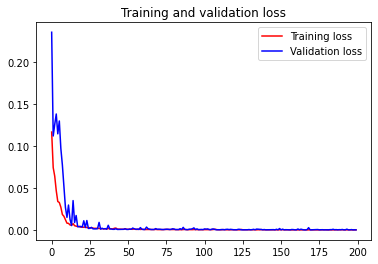

<Figure size 432x288 with 0 Axes>

In [52]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 5ms/step


((1501, 1), (167, 1))

In [54]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9956251917904524
Test data R2 score: 0.9497032479160573


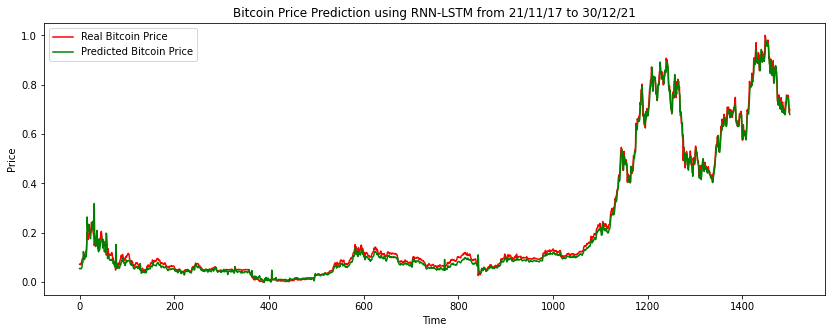

In [55]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(train_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM from 21/11/17 to 30/12/21')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

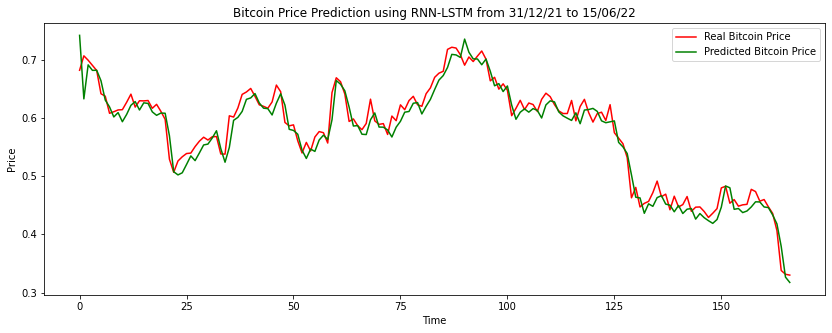

In [56]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### (b) Xgboost

In [57]:
from xgboost import XGBRegressor

In [58]:
model = XGBRegressor(n_estimators = 1000)
model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [59]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [60]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9999829857965055
Test data R2 score: 0.9686732797090736


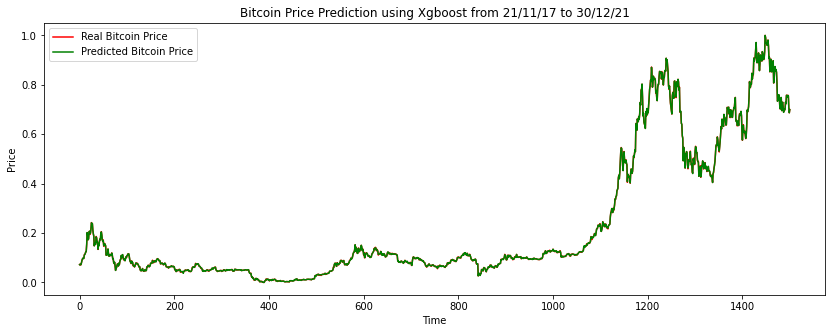

In [61]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(train_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Xgboost from 21/11/17 to 30/12/21')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

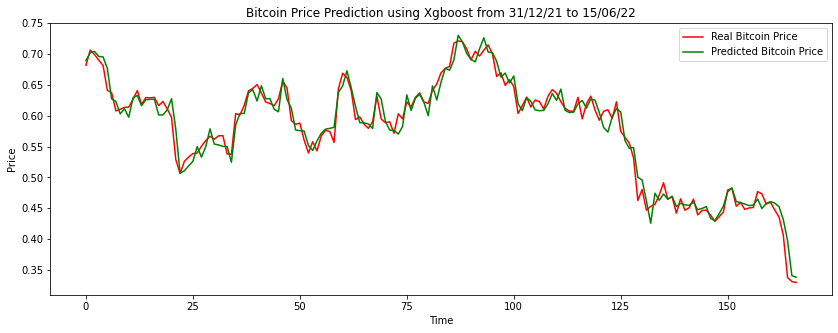

In [62]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Xgboost from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### (c) SVM

In [63]:
from sklearn.svm import SVR

##### using the linear kernel 

In [64]:
model = SVR(kernel='linear', C=1000)
model.fit(X_train, y_train.ravel())

SVR(C=1000, kernel='linear')

In [65]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [66]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9361046437400173
Test data R2 score: 0.8903086765903285


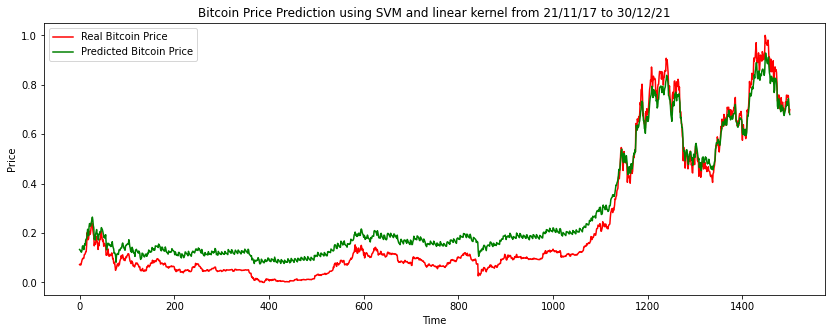

In [67]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(train_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using SVM and linear kernel from 21/11/17 to 30/12/21')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

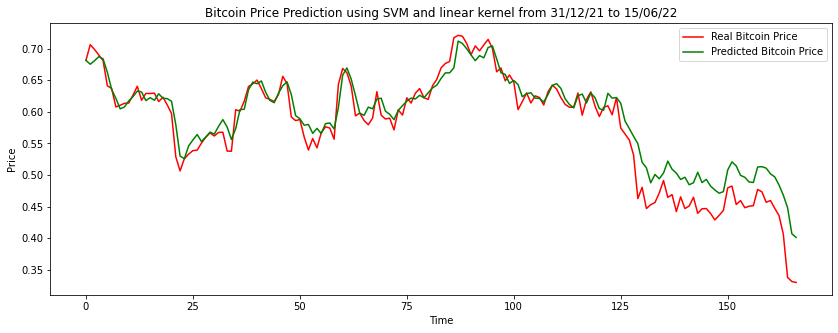

In [68]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using SVM and linear kernel from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### using the Radial Basis Function (rbf) kernel

In [69]:
model = SVR(kernel='rbf', C=1000)
model.fit(X_train, y_train.ravel())

SVR(C=1000)

In [70]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [71]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9767568369596303
Test data R2 score: 0.6704895570377085


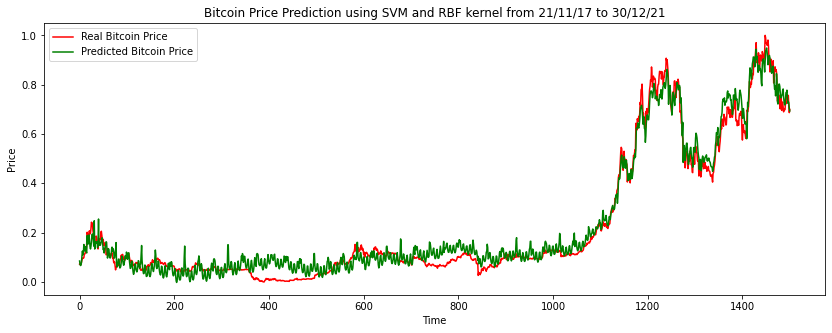

In [72]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(train_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using SVM and RBF kernel from 21/11/17 to 30/12/21')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

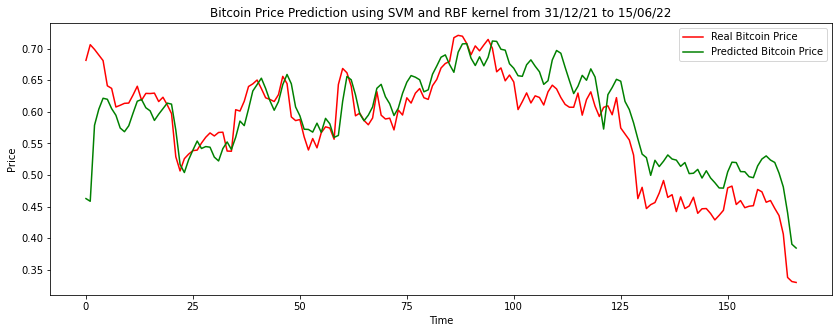

In [73]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using SVM and RBF kernel from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### (d) Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=1)

In [76]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [77]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9998308869437988
Test data R2 score: 0.9767874443425094


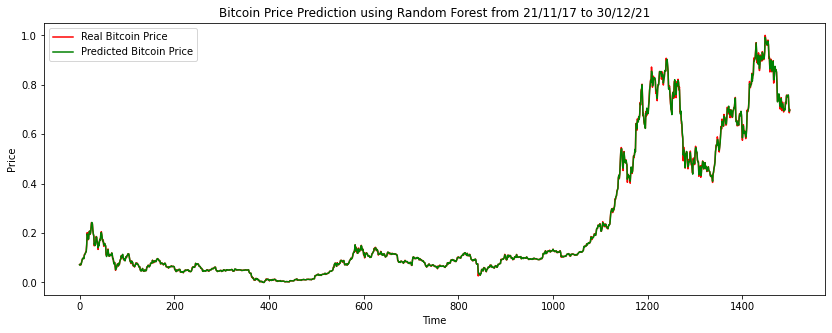

In [78]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(train_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Random Forest from 21/11/17 to 30/12/21')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

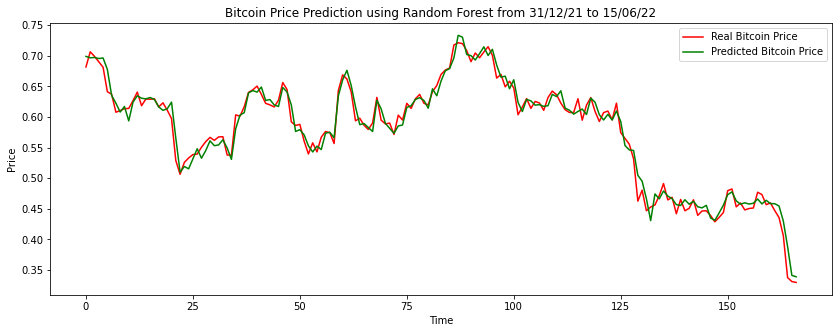

In [79]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Random Forest from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### (e) AutoML - AutoTimeSeries (Auto-TS)

In [80]:
from autots import AutoTS

In [81]:
preclean = None
{
    "fillna": None,  # mean or median one of few consistent things
    "transformations": {"0": "EWMAFilter"},
    "transformation_params": {
        "0": {"span": 14},
    },
}
metric_weighting = {
    'smape_weighting': 5,
    'mae_weighting': 2,
    'rmse_weighting': 2,
    'made_weighting': 1,
    'mage_weighting': 0,
    'mle_weighting': 0,
    'imle_weighting': 0,
    'spl_weighting': 3,
    'containment_weighting': 0,
    'contour_weighting': 0,
    'runtime_weighting': 0.05,
}

model = AutoTS(
    forecast_length=166,
    frequency="infer",
    prediction_interval=0.9,
    ensemble="simple",
    constraint= None,
    max_generations=10,
    num_validations="max",
    validation_method="backwards",
    model_list="superfast",
    transformer_list="fast",
    transformer_max_depth=2,
    initial_template="General+Random",
    metric_weighting=metric_weighting,
    models_to_validate=0.45,
    max_per_model_class=None,
    model_interrupt=True,
    n_jobs="auto",
    drop_most_recent=0,
    introduce_na=None,
    preclean=preclean,
    verbose=1,
    models_mode="default",
    random_seed=2022,
)

Using 1 cpus for n_jobs.


##### train test & split again our dataset

In [82]:

df['close_log'] = np.log(df['close'])
df['close_log_diff'] = df['close_log'] - df['close_log'].shift(1)
df = df.fillna(0)
X_test_AUTO = df.loc[(df['date'] >= '2021-12-31')
                     & (df['date'] < '2022-06-16')]

X_train_AUTO = df.loc[(df['date'] >= '2017-11-21')
                     & (df['date'] < '2021-12-31')]

In [83]:
X_train_AUTO 

unix       date   symbol      open      high       low  \
0        1511222400 2017-11-21  BTC/EUR   6932.35   6979.20   6792.43   
1        1511308800 2017-11-22  BTC/EUR   6906.20   7076.96   6884.04   
2        1511395200 2017-11-23  BTC/EUR   7014.00   7040.00   6797.33   
3        1511481600 2017-11-24  BTC/EUR   6797.70   7110.00   6721.66   
4        1511568000 2017-11-25  BTC/EUR   6882.01   7368.57   6835.20   
...             ...        ...      ...       ...       ...       ...   
1496  1640476800000 2021-12-26  BTC/EUR  44473.00  45235.00  43592.00   
1497  1640563200000 2021-12-27  BTC/EUR  44878.00  45982.00  44602.00   
1498  1640649600000 2021-12-28  BTC/EUR  44755.00  44755.00  41852.00   
1499  1640736000000 2021-12-29  BTC/EUR  42046.00  42651.00  40591.00   
1500  1640822400000 2021-12-30  BTC/EUR  40915.00  42375.00  40492.00   

             close    Volume EUR   Volume BTC  Year  ...  Dayofyear  \
0      6906.200000  1.158235e+06   167.930000  2017  ...        325   
1      7014.000000  3.367629e+06   481.290000  2017  ...        326   
2      6797.700000  1.665817e+06   239.540000  2017  ...        327   
3      6882.010000  3.875107e+06   559.790000  2017  ...        328   
4      7368.400000  8.505472e+06  1188.210000  2017  ...        329   
...            ...           ...          ...   ...  ...        ...   
1496  44844.000000  5.904994e+06   131.678580  2021  ...        360   
1497  44734.077070  1.696249e+07   379.184936  2021  ...        361   
1498  42022.000000  2.725325e+07   648.547253  2021  ...        362   
1499  40916.000000  1.303199e+07   318.505989  2021  ...        363   
1500  41638.812345  1.451135e+07   348.505443  2021  ...        364   

      Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
0            False           False           False             False   
1            False           False           False             False   
2            False           False           False             False   
3            False           False           False             False   
4            False           False           False             False   
...            ...             ...             ...               ...   
1496         False           False           False             False   
1497         False           False           False             False   
1498         False           False           False             False   
1499         False           False           False             False   
1500         False           False           False             False   

      Is_year_end  Is_year_start       Elapsed  close_log  close_log_diff  
0           False          False  1.511222e+09   8.840175        0.000000  
1           False          False  1.511309e+09   8.855663        0.015489  
2           False          False  1.511395e+09   8.824340       -0.031324  
3           False          False  1.511482e+09   8.836666        0.012326  
4           False          False  1.511568e+09   8.904956        0.068290  
...           ...            ...           ...        ...             ...  
1496        False          False  1.640477e+09  10.710945        0.008285  
1497        False          False  1.640563e+09  10.708491       -0.002454  
1498        False          False  1.640650e+09  10.645949       -0.062542  
1499        False          False  1.640736e+09  10.619276       -0.026672  
1500        False          False  1.640822e+09  10.636788        0.017512  

[1501 rows x 24 columns]

In [84]:
X_train_AUTO = X_train_AUTO[['date','open', 'high', 'low', 'Volume EUR', 'Volume BTC', 'close_log_diff']]

In [85]:
X_train_AUTO

date      open      high       low    Volume EUR   Volume BTC  \
0    2017-11-21   6932.35   6979.20   6792.43  1.158235e+06   167.930000   
1    2017-11-22   6906.20   7076.96   6884.04  3.367629e+06   481.290000   
2    2017-11-23   7014.00   7040.00   6797.33  1.665817e+06   239.540000   
3    2017-11-24   6797.70   7110.00   6721.66  3.875107e+06   559.790000   
4    2017-11-25   6882.01   7368.57   6835.20  8.505472e+06  1188.210000   
...         ...       ...       ...       ...           ...          ...   
1496 2021-12-26  44473.00  45235.00  43592.00  5.904994e+06   131.678580   
1497 2021-12-27  44878.00  45982.00  44602.00  1.696249e+07   379.184936   
1498 2021-12-28  44755.00  44755.00  41852.00  2.725325e+07   648.547253   
1499 2021-12-29  42046.00  42651.00  40591.00  1.303199e+07   318.505989   
1500 2021-12-30  40915.00  42375.00  40492.00  1.451135e+07   348.505443   

      close_log_diff  
0           0.000000  
1           0.015489  
2          -0.031324  
3           0.012326  
4           0.068290  
...              ...  
1496        0.008285  
1497       -0.002454  
1498       -0.062542  
1499       -0.026672  
1500        0.017512  

[1501 rows x 7 columns]

In [86]:
X_test_AUTO

unix       date   symbol          open       high        low  \
1501  1640908800000 2021-12-31  BTC/EUR  41635.279965  43000.000  40107.000   
1502  1640995200000 2022-01-01  BTC/EUR  40632.000000  42173.000  40632.000   
1503  1641081600000 2022-01-02  BTC/EUR  41989.000000  42220.000  41023.000   
1504  1641168000000 2022-01-03  BTC/EUR  41601.000000  41902.000  40436.000   
1505  1641254400000 2022-01-04  BTC/EUR  41110.000000  42247.000  40379.000   
...             ...        ...      ...           ...        ...        ...   
1663  1654905600000 2022-06-11  BTC/EUR  27672.000000  27973.000  26762.000   
1664  1654992000000 2022-06-12  BTC/EUR  27029.000000  27150.000  25394.000   
1665  1655078400000 2022-06-13  BTC/EUR  25393.000000  25686.000  21093.000   
1666  1655164800000 2022-06-14  BTC/EUR  21592.000000  22393.000  20045.417   
1667  1655251200000 2022-06-15  BTC/EUR  21198.000000  21226.788  20990.000   

             close    Volume EUR   Volume BTC  Year  ...  Dayofyear  \
1501  40643.878110  1.777482e+07   437.330784  2021  ...        365   
1502  42017.000000  7.089523e+06   168.729882  2022  ...          1   
1503  41600.000000  5.851754e+06   140.667156  2022  ...          2   
1504  41105.915025  1.197705e+07   291.370573  2022  ...          3   
1505  40620.000000  1.484191e+07   365.384356  2022  ...          4   
...            ...           ...          ...   ...  ...        ...   
1663  27033.000000  4.560265e+06   168.692525  2022  ...        162   
1664  25402.564410  1.086879e+07   427.862005  2022  ...        163   
1665  21606.817500  4.029265e+07  1864.811986  2022  ...        164   
1666  21247.871040  2.532188e+07  1191.737234  2022  ...        165   
1667  21168.000000  3.083673e+05    14.567614  2022  ...        166   

      Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
1501          True           False            True             False   
1502         False            True           False              True   
1503         False           False           False             False   
1504         False           False           False             False   
1505         False           False           False             False   
...            ...             ...             ...               ...   
1663         False           False           False             False   
1664         False           False           False             False   
1665         False           False           False             False   
1666         False           False           False             False   
1667         False           False           False             False   

      Is_year_end  Is_year_start       Elapsed  close_log  close_log_diff  
1501         True          False  1.640909e+09  10.612604       -0.024184  
1502        False           True  1.640995e+09  10.645830        0.033226  
1503        False          False  1.641082e+09  10.635855       -0.009974  
1504        False          False  1.641168e+09  10.623907       -0.011948  
1505        False          False  1.641254e+09  10.612016       -0.011891  
...           ...            ...           ...        ...             ...  
1663        False          False  1.654906e+09  10.204814       -0.023037  
1664        False          False  1.654992e+09  10.142605       -0.062208  
1665        False          False  1.655078e+09   9.980764       -0.161841  
1666        False          False  1.655165e+09   9.964012       -0.016752  
1667        False          False  1.655251e+09   9.960246       -0.003766  

[167 rows x 24 columns]

In [87]:
model = model.fit(X_train_AUTO, date_col='date', value_col='close_log_diff')

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SeasonalNaive in generation 0 of 10
Model Number: 16 with model 

/Users/katerinatsilingiri/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/Users/katerinatsilingiri/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 50 with model SeasonalNaive in generation 1 of 10
Model Number: 51 with model GLS in generation 1 of 10
Model Number: 52 with model GLS in generation 1 of 10
Model Number: 53 with model GLS in generation 1 of 10
Model Number: 54 with model ConstantNaive in generation 1 of 10
Model Number: 55 with model ConstantNaive in generation 1 of 10
Model Number: 56 with model ConstantNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 57 with model LastValueNaive in generation 2 of 10
Model Number: 58 with model LastValueNaive in generation 2 of 10
Model Number: 59 with model LastValueNaive in generation 2 of 10
Model Number: 60 with model SeasonalNaive in generation 2 of 10
Model Number: 61 with model SeasonalNaive in generation 2 of 10
Model Number: 62 with model SeasonalNaive in generation 2 of 10
Model Number: 63 with model SeasonalNaive in generation 2 of 10
Model Number: 64 with model AverageValueNaive in generation 2 of 10
Model Number: 65 with model AverageValu

/Users/katerinatsilingiri/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/Users/katerinatsilingiri/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 99 with model GLS in generation 4 of 10
Model Number: 100 with model GLS in generation 4 of 10
Model Number: 101 with model ConstantNaive in generation 4 of 10
Model Number: 102 with model ConstantNaive in generation 4 of 10
Model Number: 103 with model ConstantNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 104 with model SeasonalNaive in generation 5 of 10
Model Number: 105 with model LastValueNaive in generation 5 of 10
Model Number: 106 with model LastValueNaive in generation 5 of 10
Model Number: 107 with model AverageValueNaive in generation 5 of 10
Model Number: 108 with model AverageValueNaive in generation 5 of 10
Model Number: 109 with model AverageValueNaive in generation 5 of 10
Model Number: 110 with model GLS in generation 5 of 10
Model Number: 111 with model GLS in generation 5 of 10
Model Number: 112 with model ConstantNaive in generation 5 of 10
Model Number: 113 with model ConstantNaive in generation 5 of 10
New Generation: 6 of 10
Mode

Model Number: 14 of 85 with model LastValueNaive for Validation 2
14 - LastValueNaive with avg smape 158.56: 
Model Number: 15 of 85 with model LastValueNaive for Validation 2
15 - LastValueNaive with avg smape 158.56: 
Model Number: 16 of 85 with model LastValueNaive for Validation 2
16 - LastValueNaive with avg smape 158.56: 
Model Number: 17 of 85 with model LastValueNaive for Validation 2
17 - LastValueNaive with avg smape 158.56: 
Model Number: 18 of 85 with model LastValueNaive for Validation 2
18 - LastValueNaive with avg smape 158.56: 
Model Number: 19 of 85 with model LastValueNaive for Validation 2
19 - LastValueNaive with avg smape 158.56: 
Model Number: 20 of 85 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 158.56: 
Model Number: 21 of 85 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 158.56: 
Model Number: 22 of 85 with model LastValueNaive for Validation 2
22 - LastValueNaive with avg smape 158.56: 
Model Numb

7 - LastValueNaive with avg smape 152.6: 
Model Number: 8 of 85 with model LastValueNaive for Validation 3
8 - LastValueNaive with avg smape 152.61: 
Model Number: 9 of 85 with model LastValueNaive for Validation 3
9 - LastValueNaive with avg smape 152.61: 
Model Number: 10 of 85 with model LastValueNaive for Validation 3
10 - LastValueNaive with avg smape 152.61: 
Model Number: 11 of 85 with model LastValueNaive for Validation 3
11 - LastValueNaive with avg smape 152.61: 
Model Number: 12 of 85 with model LastValueNaive for Validation 3
12 - LastValueNaive with avg smape 152.61: 
Model Number: 13 of 85 with model LastValueNaive for Validation 3
13 - LastValueNaive with avg smape 152.61: 
Model Number: 14 of 85 with model LastValueNaive for Validation 3
14 - LastValueNaive with avg smape 152.61: 
Model Number: 15 of 85 with model LastValueNaive for Validation 3
15 - LastValueNaive with avg smape 152.61: 
Model Number: 16 of 85 with model LastValueNaive for Validation 3
16 - LastValueNa

Validation Round: 4
Model Number: 1 of 85 with model Ensemble for Validation 4
📈 1 - Ensemble with avg smape 165.62: 
Model Number: 2 of 85 with model SeasonalNaive for Validation 4
📈 2 - SeasonalNaive with avg smape 148.8: 
Model Number: 3 of 85 with model SeasonalNaive for Validation 4
3 - SeasonalNaive with avg smape 148.8: 
Model Number: 4 of 85 with model AverageValueNaive for Validation 4
4 - AverageValueNaive with avg smape 177.24: 
Model Number: 5 of 85 with model Ensemble for Validation 4
5 - Ensemble with avg smape 171.61: 
Model Number: 6 of 85 with model LastValueNaive for Validation 4
6 - LastValueNaive with avg smape 164.28: 
Model Number: 7 of 85 with model LastValueNaive for Validation 4
7 - LastValueNaive with avg smape 164.28: 
Model Number: 8 of 85 with model LastValueNaive for Validation 4
8 - LastValueNaive with avg smape 164.29: 
Model Number: 9 of 85 with model LastValueNaive for Validation 4
9 - LastValueNaive with avg smape 164.29: 
Model Number: 10 of 85 with 

79 - GLS with avg smape 187.1: 
Model Number: 80 of 85 with model GLS for Validation 4
80 - GLS with avg smape 186.94: 
Model Number: 81 of 85 with model ConstantNaive for Validation 4
81 - ConstantNaive with avg smape 160.91: 
Model Number: 82 of 85 with model ConstantNaive for Validation 4
82 - ConstantNaive with avg smape 171.52: 
Model Number: 83 of 85 with model ConstantNaive for Validation 4
83 - ConstantNaive with avg smape 170.92: 
Model Number: 84 of 85 with model ConstantNaive for Validation 4
84 - ConstantNaive with avg smape 170.92: 
Model Number: 85 of 85 with model ConstantNaive for Validation 4
85 - ConstantNaive with avg smape 156.7: 
Validation Round: 5
Model Number: 1 of 85 with model Ensemble for Validation 5
📈 1 - Ensemble with avg smape 168.36: 
Model Number: 2 of 85 with model SeasonalNaive for Validation 5
📈 2 - SeasonalNaive with avg smape 158.0: 
Model Number: 3 of 85 with model SeasonalNaive for Validation 5
3 - SeasonalNaive with avg smape 158.0: 
Model Numbe

71 - GLS with avg smape 181.84: 
Model Number: 72 of 85 with model GLS for Validation 5
72 - GLS with avg smape 186.06: 
Model Number: 73 of 85 with model GLS for Validation 5
73 - GLS with avg smape 186.06: 
Model Number: 74 of 85 with model GLS for Validation 5
74 - GLS with avg smape 188.58: 
Model Number: 75 of 85 with model GLS for Validation 5
75 - GLS with avg smape 188.58: 
Model Number: 76 of 85 with model GLS for Validation 5
76 - GLS with avg smape 181.84: 
Model Number: 77 of 85 with model GLS for Validation 5
77 - GLS with avg smape 188.0: 
Model Number: 78 of 85 with model GLS for Validation 5
78 - GLS with avg smape 188.16: 
Model Number: 79 of 85 with model GLS for Validation 5
79 - GLS with avg smape 188.96: 
Model Number: 80 of 85 with model GLS for Validation 5
80 - GLS with avg smape 188.0: 
Model Number: 81 of 85 with model ConstantNaive for Validation 5
81 - ConstantNaive with avg smape 166.52: 
Model Number: 82 of 85 with model ConstantNaive for Validation 5
82 -

65 - AverageValueNaive with avg smape 168.78: 
Model Number: 66 of 85 with model SeasonalNaive for Validation 6
66 - SeasonalNaive with avg smape 153.77: 
Model Number: 67 of 85 with model SeasonalNaive for Validation 6
67 - SeasonalNaive with avg smape 153.77: 
Model Number: 68 of 85 with model AverageValueNaive for Validation 6
68 - AverageValueNaive with avg smape 167.68: 
Model Number: 69 of 85 with model Ensemble for Validation 6
69 - Ensemble with avg smape 168.73: 
Model Number: 70 of 85 with model GLS for Validation 6
70 - GLS with avg smape 164.24: 
Model Number: 71 of 85 with model GLS for Validation 6
71 - GLS with avg smape 164.24: 
Model Number: 72 of 85 with model GLS for Validation 6
72 - GLS with avg smape 158.31: 
Model Number: 73 of 85 with model GLS for Validation 6
73 - GLS with avg smape 158.31: 
Model Number: 74 of 85 with model GLS for Validation 6
74 - GLS with avg smape 182.32: 
Model Number: 75 of 85 with model GLS for Validation 6
75 - GLS with avg smape 182.

59 - SeasonalNaive with avg smape 147.15: 
Model Number: 60 of 85 with model SeasonalNaive for Validation 7
60 - SeasonalNaive with avg smape 153.95: 
Model Number: 61 of 85 with model AverageValueNaive for Validation 7
61 - AverageValueNaive with avg smape 188.05: 
Model Number: 62 of 85 with model Ensemble for Validation 7
62 - Ensemble with avg smape 158.38: 
Model Number: 63 of 85 with model Ensemble for Validation 7
63 - Ensemble with avg smape 158.38: 
Model Number: 64 of 85 with model AverageValueNaive for Validation 7
64 - AverageValueNaive with avg smape 167.94: 
Model Number: 65 of 85 with model AverageValueNaive for Validation 7
65 - AverageValueNaive with avg smape 167.94: 
Model Number: 66 of 85 with model SeasonalNaive for Validation 7
66 - SeasonalNaive with avg smape 152.36: 
Model Number: 67 of 85 with model SeasonalNaive for Validation 7
67 - SeasonalNaive with avg smape 152.36: 
Model Number: 68 of 85 with model AverageValueNaive for Validation 7
68 - AverageValueNai

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 3, 'model_metric': 'best_score', 'models': {'0f044e3bd6bd7803c4a6890c03b99d82': {'Model': 'SeasonalNaive', 'ModelParameters': '{"method": "mean", "lag_1": 28, "lag_2": null}', 'TransformationParameters': '{"fillna": "ffill", "transformations": {"0": "Slice", "1": "ClipOutliers"}, "transformation_params": {"0": {"method": 0.5}, "1": {"method": "clip", "std_threshold": 5, "fillna": null}}}'}, '1156f2a87165633ddc76431e5e18a949': {'Model': 'SeasonalNaive', 'ModelParameters': '{"method": "mean", "lag_1": 28, "lag_2": null}', 'TransformationParameters': '{"fillna": "akima", "transformations": {"0": "Slice", "1": "ClipOutliers"}, "transformation_params": {"0": {"method": 0.5}, "1": {"method": "clip", "std_threshold": 5, "fillna": null}}}'}, 'a317420c200c8448e5e749f44cdd7fe2': {'Model': 'AverageValueNaive', 'ModelParameters': '{"method": "Mean", "window": 96}', 'TransformationParameters': '{"fillna": "

<Figure size 1008x360 with 0 Axes>

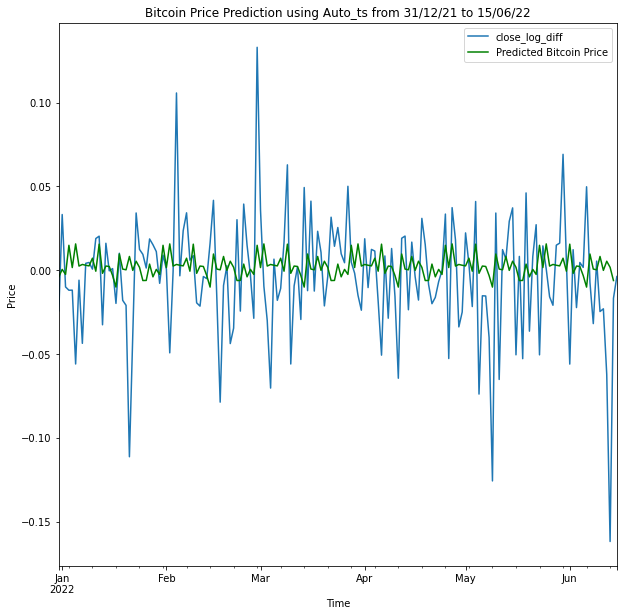

                                   ID     Model  \
154  ca1a4937b317daff860af53bd70dd250  Ensemble   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ModelParameters  \
154  {"model_name": "BestN", "model_count": 3, "model_metric": "best_score", "models": {"0f044e3bd6bd7803c4a6890c03b99d82": {"Model": "SeasonalNaive", "ModelParameters": "{\"method\": \"mean\", \"lag_1\": 28, \"lag_2\": null}", "TransformationParameters": "{\"fillna\": \"ffill\", \"transf

In [88]:
print(model)
prediction = model.predict()
print(prediction.forecast)
model_results = model.results()

validation = model.results("validation")
print(validation)
plt.figure(figsize=(14,5))
X_test_AUTO.plot(x="date", y=["close_log_diff"],
         kind="line", figsize=(10, 10))
plt.plot(prediction.forecast, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Auto_ts from 31/12/21 to 15/06/22')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print(model.best_model)